In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [2]:
# Charger le dataset
data = pd.read_csv('./Fichiers de données/Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Sélectionner les colonnes d'intérêt (salaire annuel et spending score)
X = data.iloc[:, [3, 4]].values

In [4]:
data.drop_duplicates()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.duplicated().sum()

0

In [6]:
#selection des features
X=data[["Annual Income (k$)","Spending Score (1-100)"]]
F=X.values

In [7]:
#Utiliser la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(F)
    wcss.append(kmeans.inertia_)

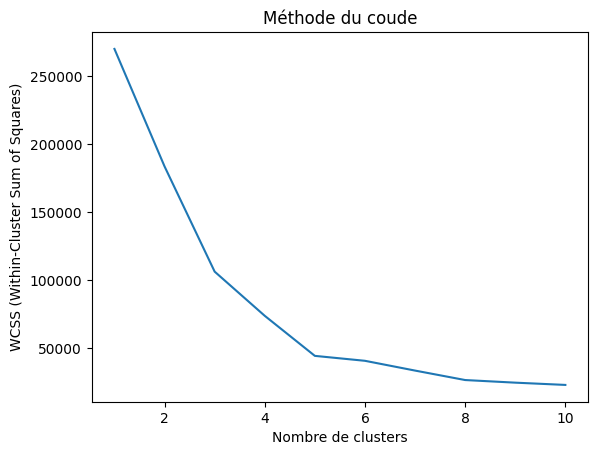

In [8]:
# Tracer le graphique du coude
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Choix du nombre optimal de clusters
k = 5  # En fonction du graphique du coude, le coude semble être à k=5

# Construction du modèle K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(F)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

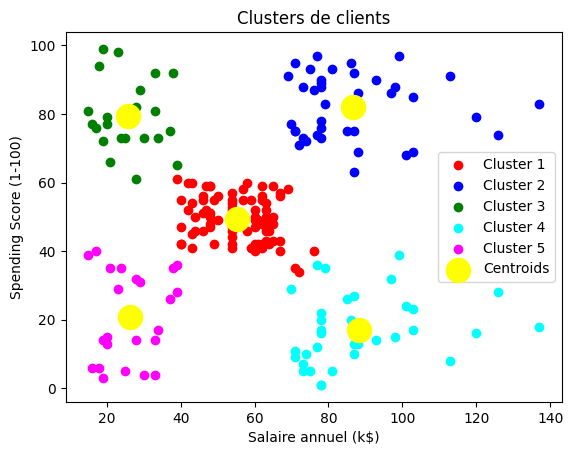

In [10]:
# Visualisation des clusters
plt.scatter(F[y_kmeans == 0, 0], F[y_kmeans == 0, 1], c='red', label='Cluster 1')
plt.scatter(F[y_kmeans == 1, 0], F[y_kmeans == 1, 1], c='blue', label='Cluster 2')
plt.scatter(F[y_kmeans == 2, 0], F[y_kmeans == 2, 1], c='green', label='Cluster 3')
plt.scatter(F[y_kmeans == 3, 0], F[y_kmeans == 3, 1], c='cyan', label='Cluster 4')
plt.scatter(F[y_kmeans == 4, 0], F[y_kmeans == 4, 1], c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title("Clusters de clients")
plt.xlabel("Salaire annuel (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [11]:
# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(F, y_kmeans)
print("Coefficient de silhouette:", silhouette_avg)

Coefficient de silhouette: 0.553931997444648
